### BUD4 growth rate count final repeat (scrambled stage positions) 

In [9]:
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate, PolyGate
import numpy as np
import scipy as sp
from scipy.stats import norm
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.api as sm
import pylab 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/eEMC007_BUD4/counts/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/ePN007/eEMC007_BUD4/counts


In [11]:
files=os.listdir('.')

In [12]:
csv_files=[]
ids=[]
for f in files:
    if ('Dap_counts.csv' in f):
        get_id=f[4:f.index('_')]
        ids.append(int(get_id))
        csv_files.append(f)


file_names=pd.DataFrame({'ID':ids,'FileName':csv_files}).sort_values('ID',ascending=True)


In [13]:
file_names['Set']=file_names['ID'].apply(lambda x:int((x-13)/49)+1)

In [14]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [25]:
arr_mean=np.zeros(shape=(16,1))
for k in range(0,1):
    mas=pd.Series()
    sub_ds=file_names.loc[file_names['Set']==(k+1),'FileName']
    for f in sub_ds:
        d=pd.read_csv(f)
        mas=mas.append(d['counts'])
    arr_mean[k]=np.mean(mas)

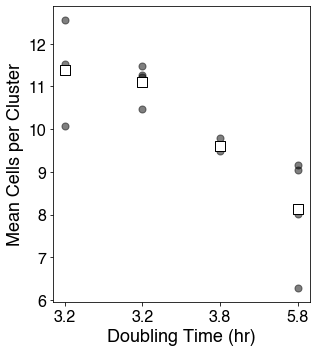

In [8]:
ar=arr_mean.reshape(4,4)
plt.rc('font',family='helvetica')
plt.figure(figsize=(4.5,5))

dt=np.round(0.693/np.array([0.22,0.22,0.18,0.12]),1)
dt_labels=[str(d) for d in dt]

plt.scatter([0,1,2,3],ar[:,0],s=50,color='black',alpha=0.5)
plt.scatter([0,1,2,3],ar[:,1],s=50,color='black',alpha=0.5)
plt.scatter([0,1,2,3],ar[:,2],s=50,color='black',alpha=0.5)
plt.scatter([0,1,2,3],ar[:,3],s=50,color='black',alpha=0.5)
plt.scatter([0,1,2,3],ar.mean(axis=1),color='white',marker='s',s=100,edgecolor='black')
# plt.ylim(7.5,12)
plt.xticks([0,1,2,3],dt_labels,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'Doubling Time (hr)',fontsize=18)
plt.ylabel('Mean Cells per Cluster',fontsize=18)
plt.tight_layout()
plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/bud4p_doubling_time.jpg',dpi=600)

Fast Growth =  1.5428571428571427
Slow Growth =  1.1328671328671327


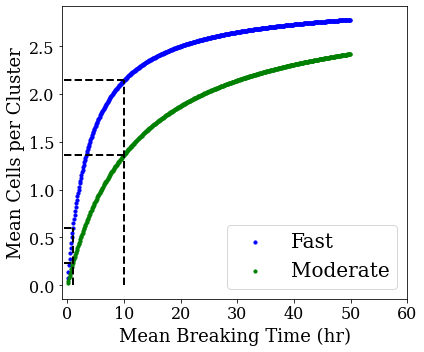

In [138]:
def rheostat(mbt,dt_thrs):
    return 3*(mbt/(mbt+dt_thrs))

mbt=np.arange(1,500,1)/10

plt.rc('font',family='serif')
plt.figure(figsize=(6,5))

plt.scatter(mbt,rheostat(mbt,4),color='blue',s=10)
# plt.scatter(mbt,rheostat(mbt,8),color='red',s=10)
plt.scatter(mbt,rheostat(mbt,12),color='green',s=10)

plt.legend(['Fast','Moderate','Slow'],fontsize=20)

xmin=1
xmax=10

plt.plot([xmin,xmin],[0,rheostat(xmin,4)],'--',color='black',linewidth=2)
plt.plot([xmax,xmax],[0,rheostat(xmax,4)],'--',color='black',linewidth=2)

plt.plot([-10,xmin],[rheostat(xmin,4),rheostat(xmin,4)],'--',color='black',linewidth=2)
plt.plot([-10,xmax],[rheostat(xmax,4),rheostat(xmax,4)],'--',color='black',linewidth=2)

plt.plot([-10,xmin],[rheostat(xmin,12),rheostat(xmin,12)],'--',color='black',linewidth=2)
plt.plot([-10,xmax],[rheostat(xmax,12),rheostat(xmax,12)],'--',color='black',linewidth=2)

dr_fast=rheostat(xmax,4)-rheostat(xmin,4)
dr_slow=rheostat(xmax,12)-rheostat(xmin,12)

print('Fast Growth = ',dr_fast)
print('Slow Growth = ',dr_slow)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Mean Breaking Time (hr)',fontsize=18)
plt.ylabel('Mean Cells per Cluster',fontsize=18)
# plt.ylim(0,260)
plt.xlim(-1,60)
plt.tight_layout()

Fast Growth =  1.1428571428571428
Slow Growth =  0.9350649350649349


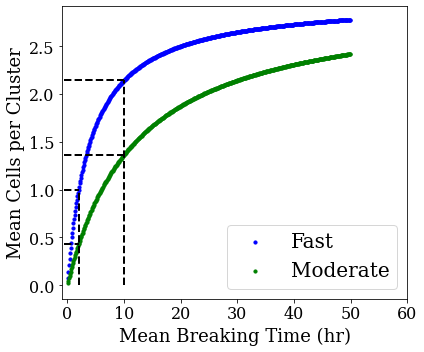

In [150]:
def rheostat(mbt,dt_thrs):
    return 3*(mbt/(mbt+dt_thrs))

mbt=np.arange(1,500,1)/10

plt.rc('font',family='serif')
plt.figure(figsize=(6,5))

plt.scatter(mbt,rheostat(mbt,4),color='blue',s=10)
# plt.scatter(mbt,rheostat(mbt,8),color='red',s=10)
plt.scatter(mbt,rheostat(mbt,12),color='green',s=10)

plt.legend(['Fast','Moderate','Slow'],fontsize=20)

xmin=2
xmax=10
# xmid=10

plt.plot([xmin,xmin],[0,rheostat(xmin,4)],'--',color='black',linewidth=2)
plt.plot([xmax,xmax],[0,rheostat(xmax,4)],'--',color='black',linewidth=2)
# plt.plot([xmid,xmid],[0,rheostat(xmid,4)],'--',color='black',linewidth=2)


plt.plot([-10,xmin],[rheostat(xmin,4),rheostat(xmin,4)],'--',color='black',linewidth=2)
plt.plot([-10,xmax],[rheostat(xmax,4),rheostat(xmax,4)],'--',color='black',linewidth=2)
# plt.plot([-10,xmid],[rheostat(xmid,4),rheostat(xmid,4)],'--',color='black',linewidth=2)

plt.plot([-10,xmin],[rheostat(xmin,12),rheostat(xmin,12)],'--',color='black',linewidth=2)
plt.plot([-10,xmax],[rheostat(xmax,12),rheostat(xmax,12)],'--',color='black',linewidth=2)
# plt.plot([-10,xmid],[rheostat(xmid,12),rheostat(xmid,12)],'--',color='black',linewidth=2)


dr_fast=rheostat(xmax,4)-rheostat(xmin,4)
dr_slow=rheostat(xmax,12)-rheostat(xmin,12)

print('Fast Growth = ',dr_fast)
print('Slow Growth = ',dr_slow)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Mean Breaking Time (hr)',fontsize=18)
plt.ylabel('Mean Cells per Cluster',fontsize=18)
# plt.ylim(0,260)
plt.xlim(-1,60)
plt.tight_layout()

In [145]:
2.5*2*2

10.0

In [146]:
2.5*6*2

30.0